In [14]:
import pandas as pd
import dill
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
import os
import sys

In [15]:
RESULTS_DIR = '/Users/hailey/repos/convex_wi23/results/'
assert os.path.exists(RESULTS_DIR)

In [16]:
FIG_DIR = '/Users/hailey/Dropbox/Apps/Overleaf/convex_optimization_project/figures/'
assert os.path.exists(FIG_DIR)

In [20]:
basic_results_file = 'results_basic.pkl'
generated_results_file = 'results_gen_3_19.pkl'
with open(os.path.join(RESULTS_DIR, basic_results_file), 'rb') as infile:
    results_basic = dill.load(infile)
with open(os.path.join(RESULTS_DIR, generated_results_file), 'rb') as infile:
    results_gen = dill.load(infile)


In [21]:
df_basic = pd.DataFrame(data=results_basic)
df_generated = pd.DataFrame(data=results_gen)
df_basic[['b1', 'b2', 'b3', 'b4', 'b5']] = pd.DataFrame(df_basic.b.tolist(), index= df_basic.index)
df_basic[['x1', 'x2', 'x3']] = pd.DataFrame(df_basic.x.tolist(), index= df_basic.index)
df_generated[['b1', 'b2', 'b3', 'b4', 'b5']] = pd.DataFrame(df_generated.b.tolist(), index= df_generated.index)
df_generated[['x1', 'x2', 'x3']] = pd.DataFrame(df_generated.x.tolist(), index= df_generated.index)

In [22]:
df_basic

,is_infeasible,objective_val,x,b,attacker,defender,b1,b2,b3,b4,b5,x1,x2,x3
0,False,360.0,"[130.0, 75.0, 155.0]","[162.0, 107.0, 187.0, 6318.0, 11685.0]",flutter-mane,flutter-mane,162.0,107.0,187.0,6318.0,11685.0,130.0,75.0,155.0
1,False,355.0,"[131.0, 134.0, 90.0]","[163.0, 166.0, 112.0, 6318.0, 11685.0]",flutter-mane,iron-bundle,163.0,166.0,112.0,6318.0,11685.0,131.0,134.0,90.0
2,False,445.0,"[229.0, 128.0, 88.0]","[261.0, 160.0, 120.0, 6318.0, 11685.0]",flutter-mane,iron-hands,261.0,160.0,120.0,6318.0,11685.0,229.0,128.0,88.0
3,False,414.0,"[190.0, 151.0, 73.0]","[222.0, 183.0, 105.0, 6318.0, 11685.0]",flutter-mane,great-tusk,222.0,183.0,105.0,6318.0,11685.0,190.0,151.0,73.0
4,False,388.0,"[162.0, 115.0, 111.0]","[194.0, 147.0, 143.0, 6318.0, 11685.0]",flutter-mane,gholdengo,194.0,147.0,143.0,6318.0,11685.0,162.0,115.0,111.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
139,False,445.0,"[225.0, 135.0, 85.0]","[257.0, 167.0, 117.0, 11685.0, 10332.0]",kingambit,dondozo,257.0,167.0,117.0,11685.0,10332.0,225.0,135.0,85.0
140,False,340.0,"[143.0, 82.0, 115.0]","[175.0, 112.0, 147.0, 11685.0, 10332.0]",kingambit,tatsugiri,175.0,112.0,147.0,11685.0,10332.0,143.0,82.0,115.0
141,False,401.0,"[166.0, 115.0, 120.0]","[198.0, 147.0, 152.0, 11685.0, 10332.0]",kingambit,dragonite,198.0,147.0,152.0,11685.0,10332.0,166.0,115.0,120.0
142,False,392.0,"[180.0, 91.0, 121.0]","[212.0, 123.0, 153.0, 11685.0, 10332.0]",kingambit,roaring-moon,212.0,123.0,153.0,11685.0,10332.0,180.0,91.0,121.0


In [23]:
df_generated

,is_infeasible,objective_val,x,b,attacker,defender,b1,b2,b3,b4,b5,x1,x2,x3
0,False,360.0,"[130.0, 75.0, 155.0]","[162, 107, 187, 8000, 12000]",generated,flutter-mane,162,107,187,8000,12000,130.0,75.0,155.0
1,False,360.0,"[130.0, 75.0, 155.0]","[162, 107, 187, 8000, 12100]",generated,flutter-mane,162,107,187,8000,12100,130.0,75.0,155.0
2,False,360.0,"[130.0, 75.0, 155.0]","[162, 107, 187, 8000, 12200]",generated,flutter-mane,162,107,187,8000,12200,130.0,75.0,155.0
3,False,360.0,"[130.0, 75.0, 155.0]","[162, 107, 187, 8000, 12300]",generated,flutter-mane,162,107,187,8000,12300,130.0,75.0,155.0
4,False,360.0,"[130.0, 75.0, 155.0]","[162, 107, 187, 8000, 12400]",generated,flutter-mane,162,107,187,8000,12400,130.0,75.0,155.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7995,False,411.0,"[149.0, 107.0, 155.0]","[162, 107, 187, 15900, 21500]",generated,flutter-mane,162,107,187,15900,21500,149.0,107.0,155.0
7996,False,411.0,"[149.0, 107.0, 155.0]","[162, 107, 187, 15900, 21600]",generated,flutter-mane,162,107,187,15900,21600,149.0,107.0,155.0
7997,False,411.0,"[149.0, 107.0, 155.0]","[162, 107, 187, 15900, 21700]",generated,flutter-mane,162,107,187,15900,21700,149.0,107.0,155.0
7998,False,411.0,"[149.0, 107.0, 155.0]","[162, 107, 187, 15900, 21800]",generated,flutter-mane,162,107,187,15900,21800,149.0,107.0,155.0


In [24]:
df_basic[df_basic["attacker"] == 'tatsugiri']

,is_infeasible,objective_val,x,b,attacker,defender,b1,b2,b3,b4,b5,x1,x2,x3
96,False,360.0,"[130.0, 75.0, 155.0]","[162.0, 107.0, 187.0, 8064.0, 14742.0]",tatsugiri,flutter-mane,162.0,107.0,187.0,8064.0,14742.0,130.0,75.0,155.0
97,False,378.0,"[132.0, 134.0, 112.0]","[163.0, 166.0, 112.0, 8064.0, 14742.0]",tatsugiri,iron-bundle,163.0,166.0,112.0,8064.0,14742.0,132.0,134.0,112.0
98,False,445.0,"[229.0, 128.0, 88.0]","[261.0, 160.0, 120.0, 8064.0, 14742.0]",tatsugiri,iron-hands,261.0,160.0,120.0,8064.0,14742.0,229.0,128.0,88.0
99,False,419.0,"[190.0, 151.0, 78.0]","[222.0, 183.0, 105.0, 8064.0, 14742.0]",tatsugiri,great-tusk,222.0,183.0,105.0,8064.0,14742.0,190.0,151.0,78.0
100,False,388.0,"[162.0, 115.0, 111.0]","[194.0, 147.0, 143.0, 8064.0, 14742.0]",tatsugiri,gholdengo,194.0,147.0,143.0,8064.0,14742.0,162.0,115.0,111.0
101,False,379.0,"[189.0, 90.0, 100.0]","[221.0, 122.0, 132.0, 8064.0, 14742.0]",tatsugiri,amoonguss,221.0,122.0,132.0,8064.0,14742.0,189.0,90.0,100.0
102,False,365.0,"[165.0, 100.0, 100.0]","[197.0, 132.0, 132.0, 8064.0, 14742.0]",tatsugiri,arcanine,197.0,132.0,132.0,8064.0,14742.0,165.0,100.0,100.0
103,False,445.0,"[225.0, 135.0, 85.0]","[257.0, 167.0, 117.0, 8064.0, 14742.0]",tatsugiri,dondozo,257.0,167.0,117.0,8064.0,14742.0,225.0,135.0,85.0
104,False,338.0,"[143.0, 80.0, 115.0]","[175.0, 112.0, 147.0, 8064.0, 14742.0]",tatsugiri,tatsugiri,175.0,112.0,147.0,8064.0,14742.0,143.0,80.0,115.0
105,False,401.0,"[166.0, 115.0, 120.0]","[198.0, 147.0, 152.0, 8064.0, 14742.0]",tatsugiri,dragonite,198.0,147.0,152.0,8064.0,14742.0,166.0,115.0,120.0


In [25]:
def bar_plot_by_attacker(attacker, df, save_path=''):
    fig, ax = plt.subplots(1,1, figsize=(20, 10))
    b1_df = df[df["attacker"] == attacker][["defender", "objective_val"]]
    b1_df["objective_val_lb"] = df.apply(lambda row: row["objective_val"] + (sum(row["x"]) - (row["b1"] + row["b2"] + row["b3"] - 96)), axis = 1)
    b1_df = b1_df.sort_values(by=["objective_val"])

    sb.barplot(data=b1_df, x="defender", y="objective_val_lb", ax=ax, color="darksalmon")
    sb.barplot(data=b1_df, x="defender", y="objective_val", ax=ax, color="darkturquoise")

    ax.set(xlabel='defender', ylabel='Objective Value')
    ax.set_title(f"Attacker: {attacker}")

    plt.rcParams.update({'font.size': 30})
    plt.xticks(rotation=60)
    try:
        save_path = save_path if save_path else os.path.join(FIG_DIR,f'objective_bar_plot_{attacker}.png')
        plt.savefig(save_path, bbox_inches='tight')
        print(f'fig saved to {save_path}')
    except:
        print('fig not saved')
    plt.show()


fig saved to /Users/hailey/Dropbox/Apps/Overleaf/convex_optimization_project/figures/objective_bar_plot_tatsugiri.png


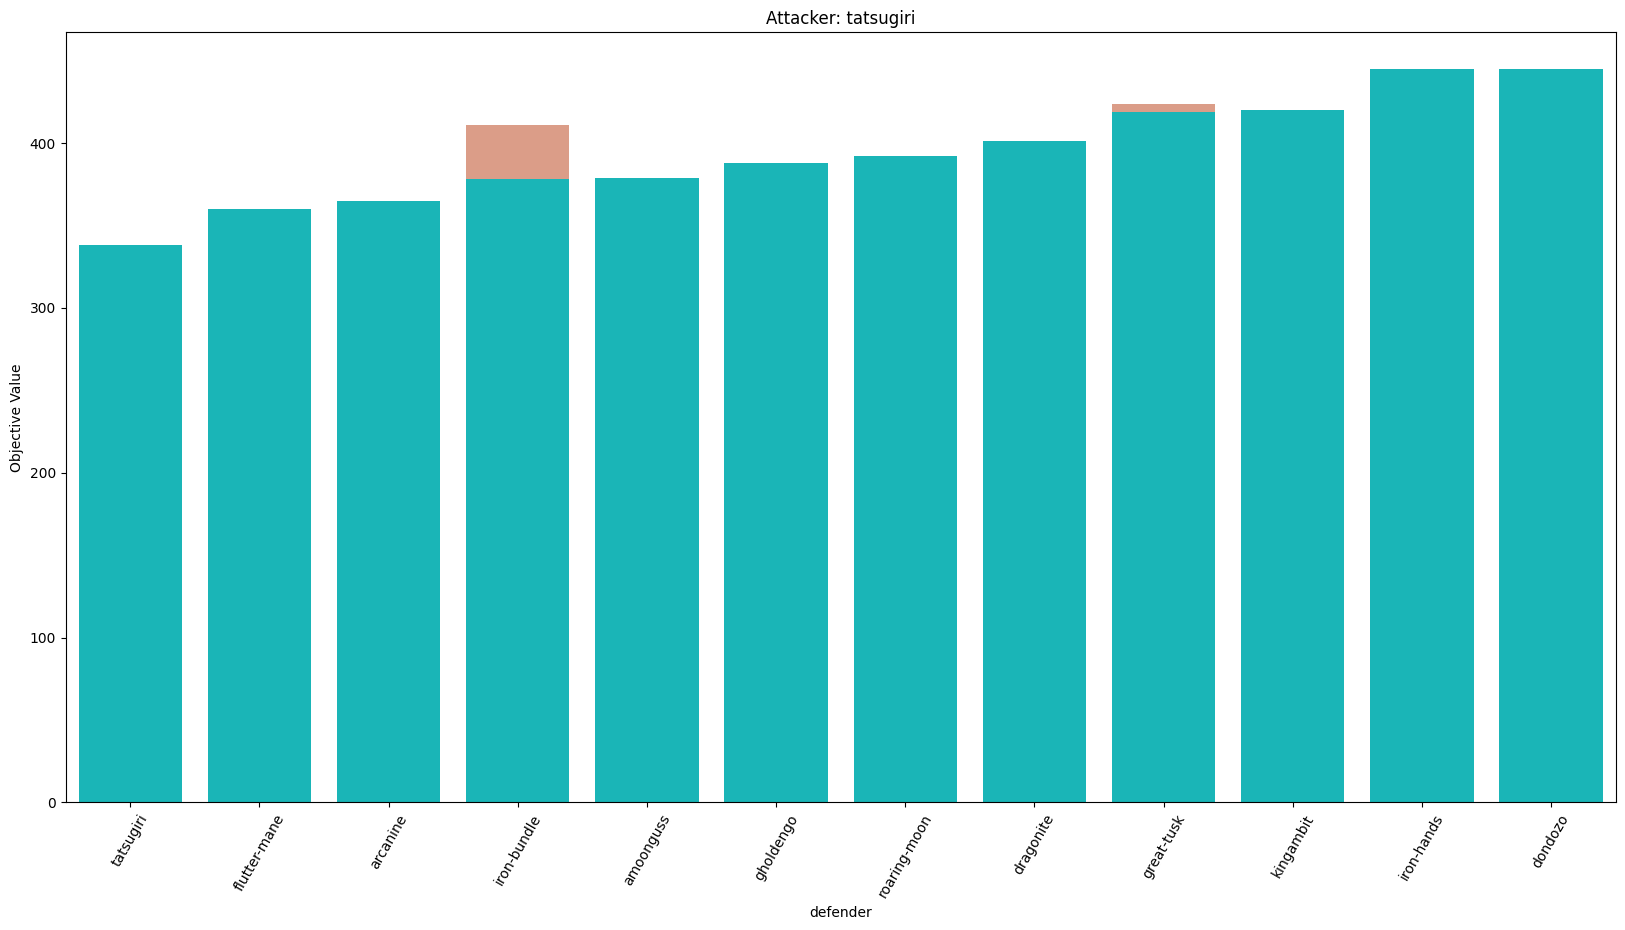

In [26]:
bar_plot_by_attacker('tatsugiri', df_basic, save_path='')

In [33]:
attacker_subset = ['gholdengo', 'arcanine', 'dondozo', 'amoonguss', 'kingambit']
defender

'flutter-mane'

In [34]:
df = df_basic.copy()
df[df['attacker'].isin(attacker_subset) & (df['defender'] == defender)]

,is_infeasible,objective_val,x,b,attacker,defender,b1,b2,b3,b4,b5,x1,x2,x3
48,False,360.0,"[130.0, 75.0, 155.0]","[162.0, 107.0, 187.0, 5904.0, 17052.0]",gholdengo,flutter-mane,162.0,107.0,187.0,5904.0,17052.0,130.0,75.0,155.0
60,False,360.0,"[130.0, 75.0, 155.0]","[162.0, 107.0, 187.0, 7200.0, 11700.0]",amoonguss,flutter-mane,162.0,107.0,187.0,7200.0,11700.0,130.0,75.0,155.0
72,False,384.0,"[130.0, 99.0, 155.0]","[162.0, 107.0, 187.0, 12816.0, 13026.0]",arcanine,flutter-mane,162.0,107.0,187.0,12816.0,13026.0,130.0,99.0,155.0
84,False,378.0,"[130.0, 93.0, 155.0]","[162.0, 107.0, 187.0, 12024.0, 8448.0]",dondozo,flutter-mane,162.0,107.0,187.0,12024.0,8448.0,130.0,93.0,155.0
132,False,375.0,"[130.0, 90.0, 155.0]","[162.0, 107.0, 187.0, 11685.0, 10332.0]",kingambit,flutter-mane,162.0,107.0,187.0,11685.0,10332.0,130.0,90.0,155.0


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


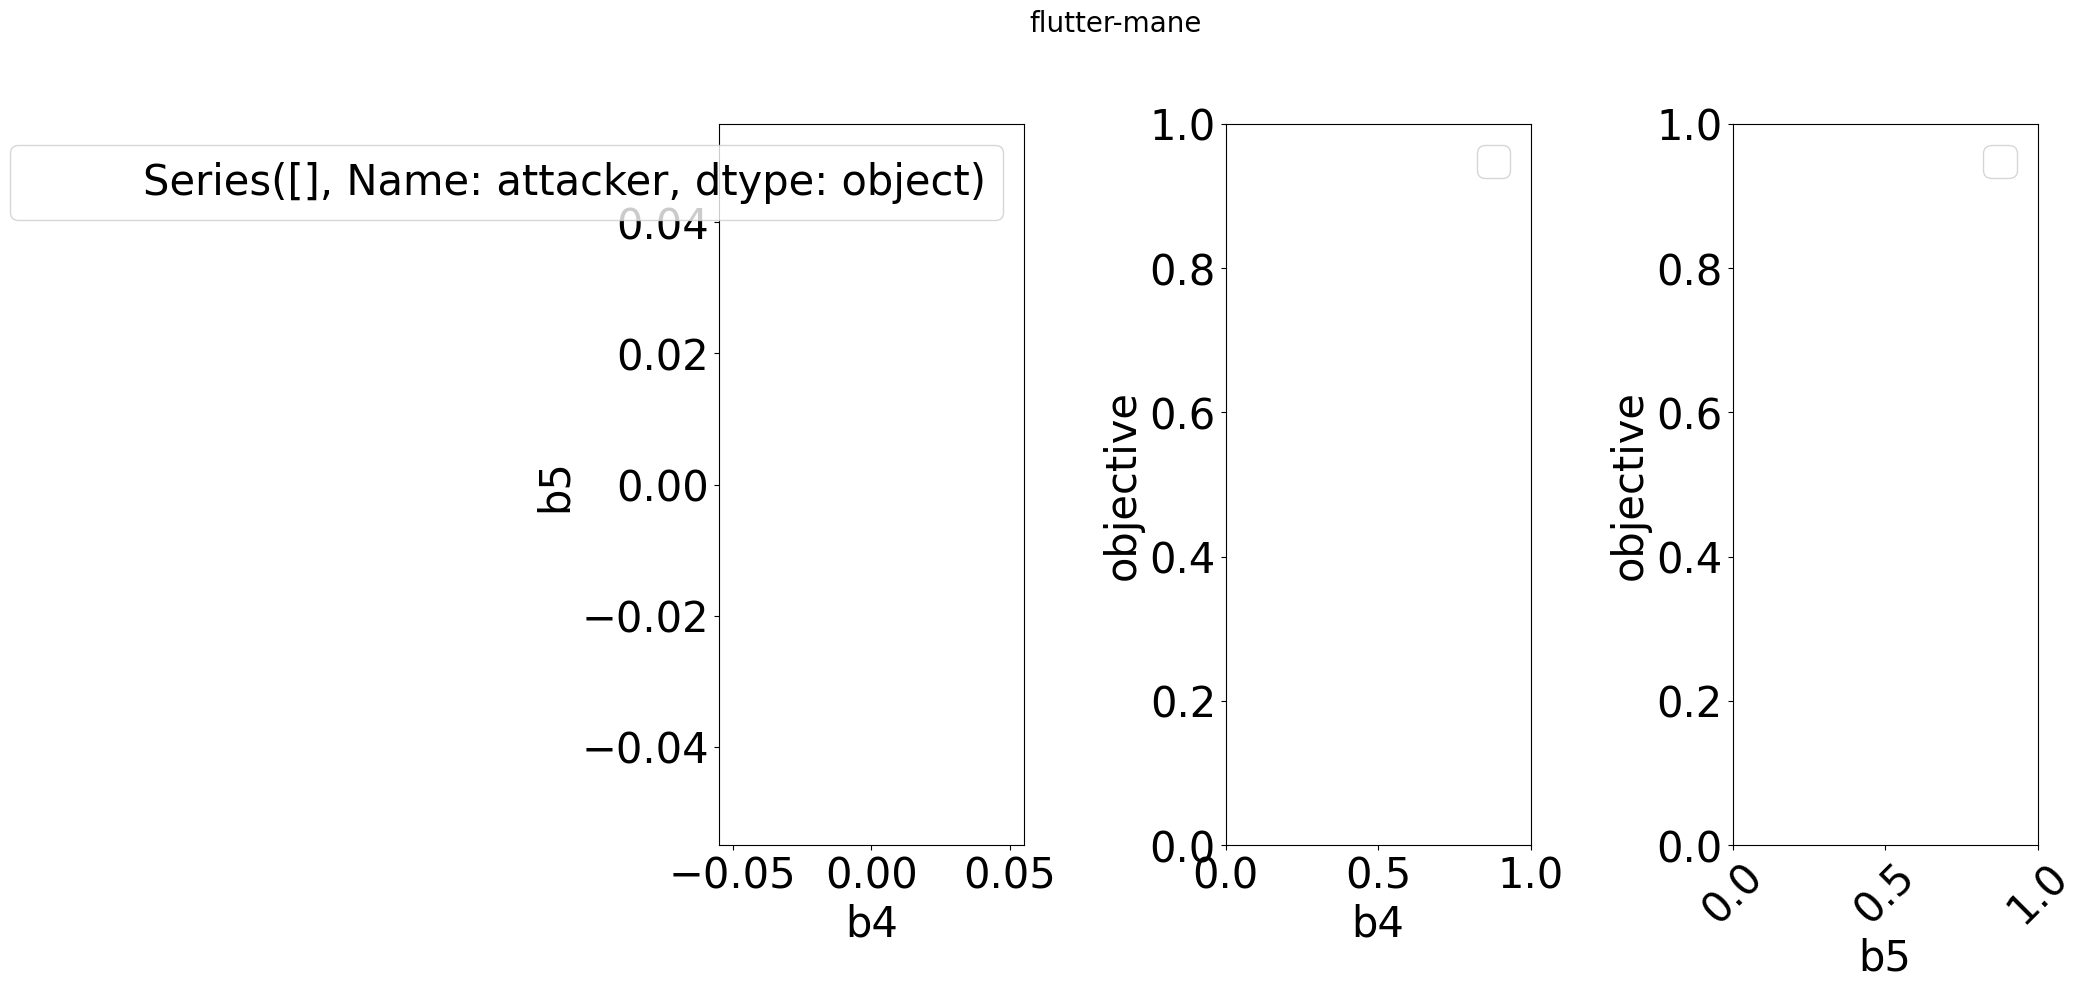

In [30]:
# def scatter_plot_by_defender(defender, df, df_generated, attacker_subset, save_path=''):
defender='flutter-mane'
df = df_basic.copy()



colors = ['grey', 'black','red', 'lime', 'orange', 'plum', 'aqua', 'skyblue', 'pink', 'sienna', 'darkblue', 'burlywood']
fig, ax = plt.subplots(1,3, figsize=(20, 10))
fig.suptitle(defender, fontsize=20)
df = df[df['attacker'].isin(attacker_subset)& (df['defender'] == defender)]
colors ={a:c for a,c in zip(attacker_subset, colors)}

ax[0].scatter(df['b4'], df['b5'], marker='o', c=df['attacker'].map(colors), label=df['attacker'], s=150)

# set axis labels
ax[0].legend()
ax[0].set_xlabel("b4")
ax[0].set_ylabel("b5")
ax[1].legend()
ax[1].set_xlabel("b4")
ax[1].set_ylabel("objective")
ax[2].legend()
ax[2].set_xlabel("b5")
ax[2].set_ylabel("objective")
plt.tight_layout()
plt.xticks(rotation = 45)
plt.rcParams.update({'font.size': 20})
plt.show()
    

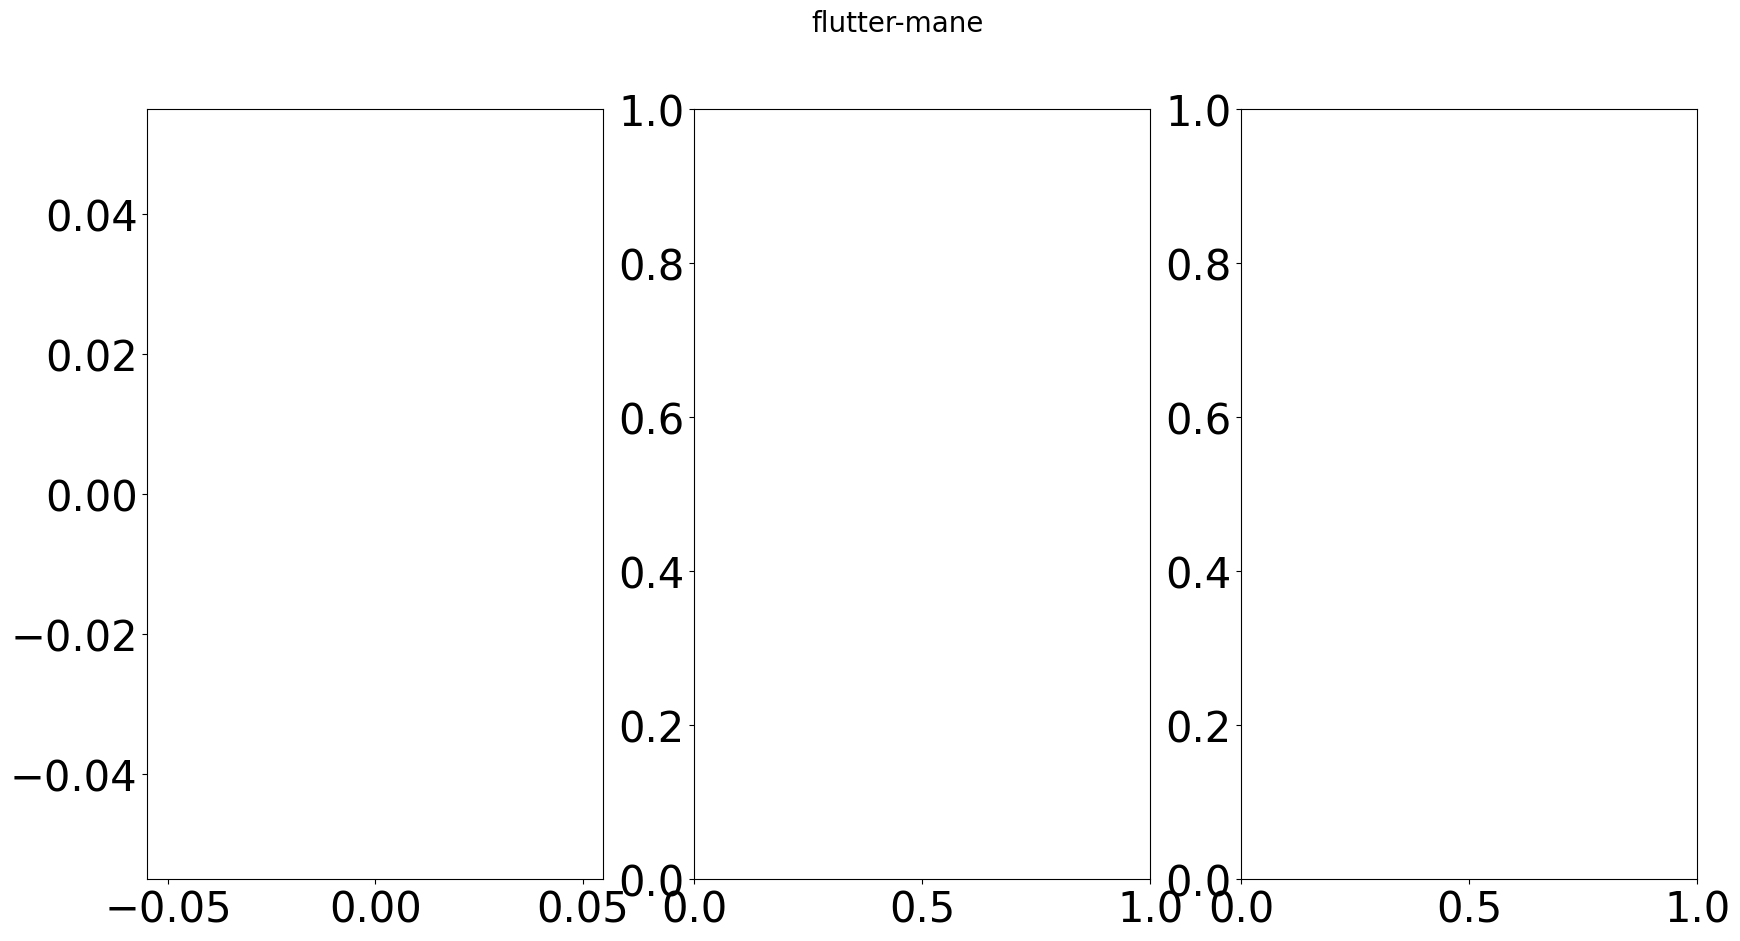

In [146]:
scatter_plot_by_defender('flutter-mane', df, df_generated, attacker_subset, save_path='')

In [90]:
def get_scatter_df(defender):
  scatter_df = df.copy()
  scatter_df = scatter_df[["is_infeasible", "b4", "b5", "objective_val", "attacker", "defender"]]
  return scatter_df[scatter_df["defender"] == defender]

generated_scatter_df = df_generated.copy()
generated_scatter_df["b4"] = df_generated.apply(lambda row: list(row["b"])[3], axis = 1)
generated_scatter_df["b5"] = df_generated.apply(lambda row: list(row["b"])[4], axis = 1)


In [91]:
generated_scatter_df = generated_scatter_df.sort_values(by=['objective_val'], ascending=True)

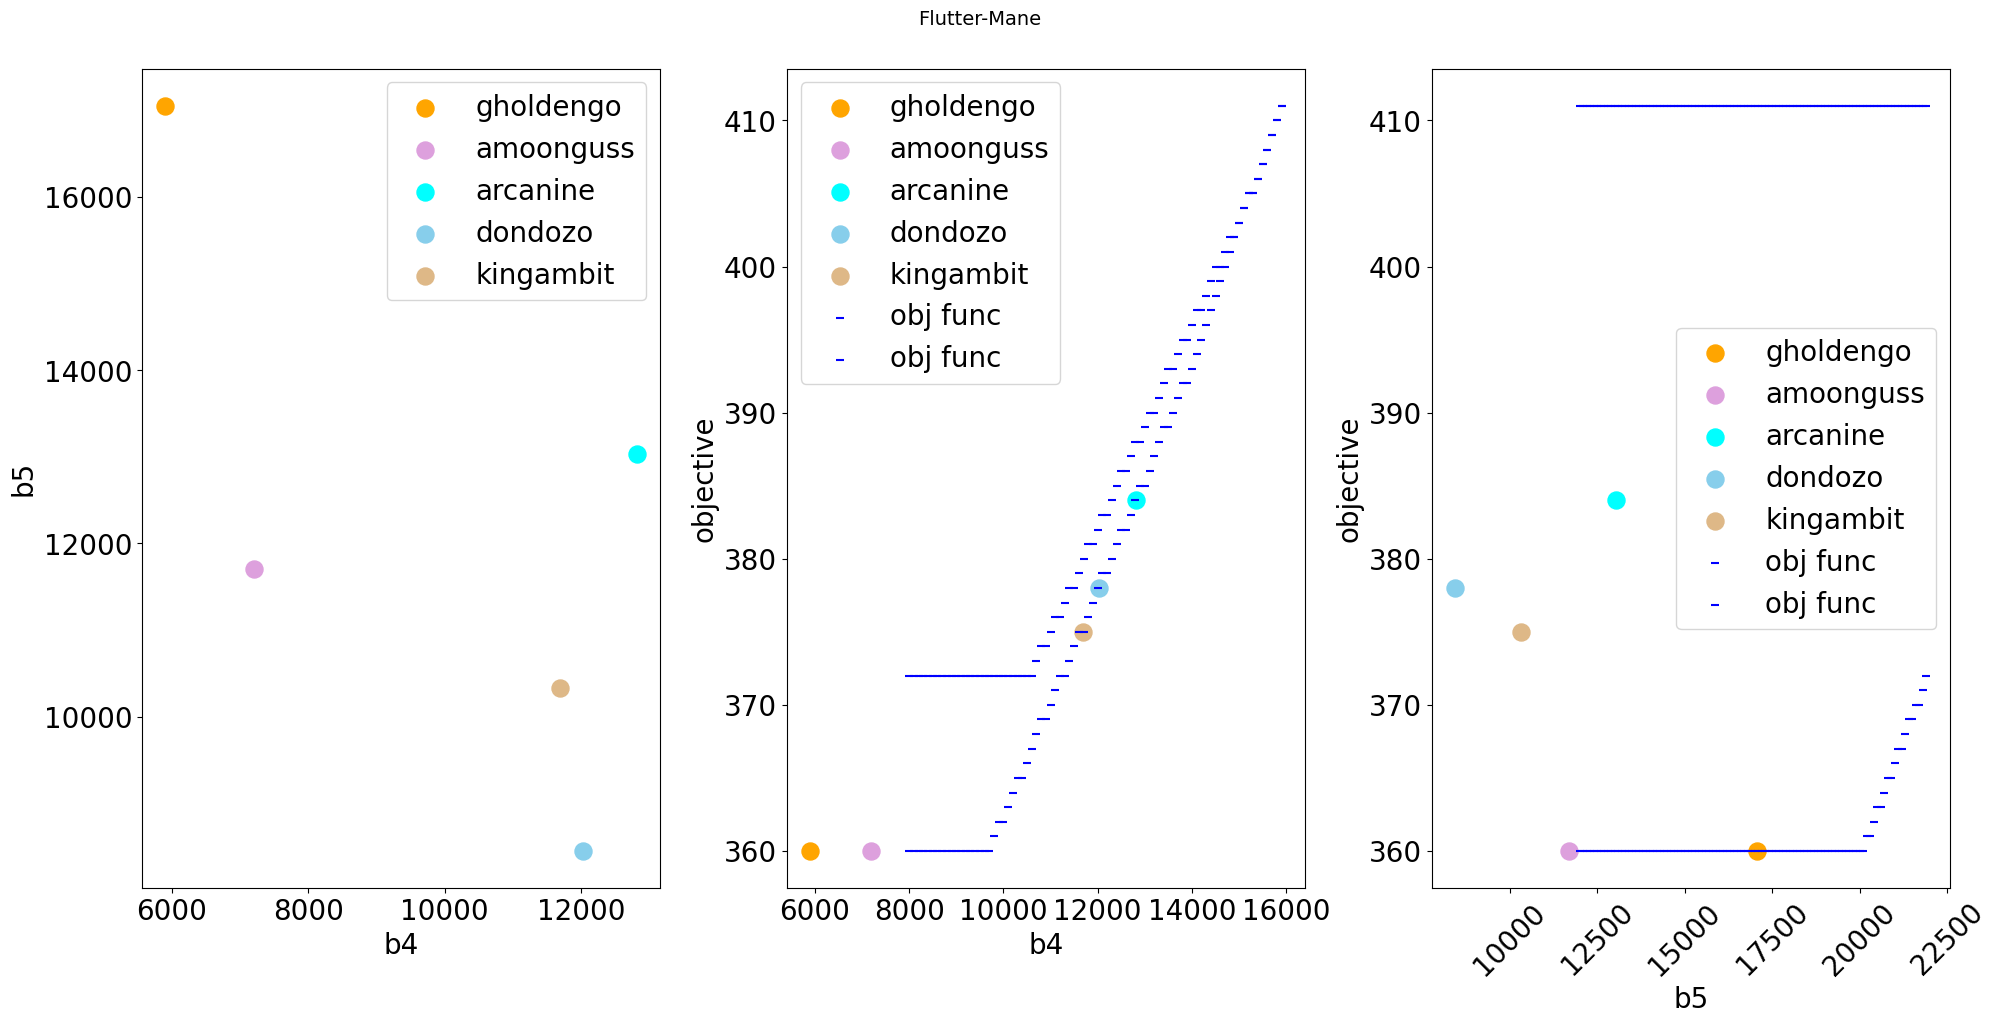

In [118]:
color_dict = {
    "flutter-mane": 'grey', 
    "iron-bundle": 'black',
    "iron-hands": 'red', 
    "great-tusk": 'lime', 
    "gholdengo": 'orange', 
    "amoonguss": 'plum', 
    "arcanine": 'aqua', 
    "dondozo": 'skyblue', 
    "tatsugiri": 'pink', 
    "dragonite": 'sienna', 
    "roaring-moon": 'darkblue', 
    "kingambit": 'burlywood'
    }


def create_scatter(defender, df, generated_scatter_df):
    fig, ax = plt.subplots(1,3, figsize=(20, 10))
    fig.suptitle(defender, fontsize=20)
    defender

    df = df[(df["attacker"] == 'gholdengo') | (df["attacker"] == 'arcanine') | (df["attacker"] == 'dondozo') | (df["attacker"] == "amoonguss") | (df["attacker"] == 'kingambit')]

    for b4, b5, objective_val, attacker in zip(df['b4'].tolist(), df['b5'].tolist(), df["objective_val"].tolist(), df['attacker']):
      ax[0].scatter([b4], [b5], marker='o', c=color_dict[attacker], label=attacker, s=150)
      ax[1].scatter([b4], [objective_val], marker='o', c=color_dict[attacker], label=attacker, s=150)
      ax[2].scatter([b5], [objective_val], marker='o', c=color_dict[attacker], label=attacker, s=150)
    generated_scatter_df = generated_scatter_df.sort_values(by=['objective_val'], ascending=True)
    generated_scatter_df_b4_lower = generated_scatter_df.drop_duplicates(subset=['b4'], keep='first', inplace=False)
    generated_scatter_df_b4_upper = generated_scatter_df.drop_duplicates(subset=['b4'], keep='last', inplace=False)
    generated_scatter_df_b5_lower = generated_scatter_df.drop_duplicates(subset=['b5'], keep='first', inplace=False)
    generated_scatter_df_b5_upper = generated_scatter_df.drop_duplicates(subset=['b5'], keep='last', inplace=False)
    ax[1].scatter(generated_scatter_df_b4_lower['b4'].tolist(), generated_scatter_df_b4_lower['objective_val'].tolist(), marker='_', c='blue', label='obj func')   
    ax[1].scatter(generated_scatter_df_b4_upper['b4'].tolist(), generated_scatter_df_b4_upper['objective_val'].tolist(), marker='_', c='blue', label='obj func')   
    ax[2].scatter(generated_scatter_df_b5_lower['b5'].tolist(), generated_scatter_df_b5_lower['objective_val'].tolist(), marker='_', c='blue', label='obj func')   
    ax[2].scatter(generated_scatter_df_b5_upper['b5'].tolist(), generated_scatter_df_b5_upper['objective_val'].tolist(), marker='_', c='blue', label='obj func')   

    
    ax[0].legend()
    ax[0].set_xlabel("b4")
    ax[0].set_ylabel("b5")
    ax[1].legend()
    ax[1].set_xlabel("b4")
    ax[1].set_ylabel("objective")
    ax[2].legend()
    ax[2].set_xlabel("b5")
    ax[2].set_ylabel("objective")
    plt.tight_layout()
    plt.xticks(rotation = 45)
    plt.rcParams.update({'font.size': 20})

    plt.show()
    
flutter_mane_df = get_scatter_df('flutter-mane')

create_scatter(flutter_mane_df, generated_scatter_df, "Flutter-Mane")


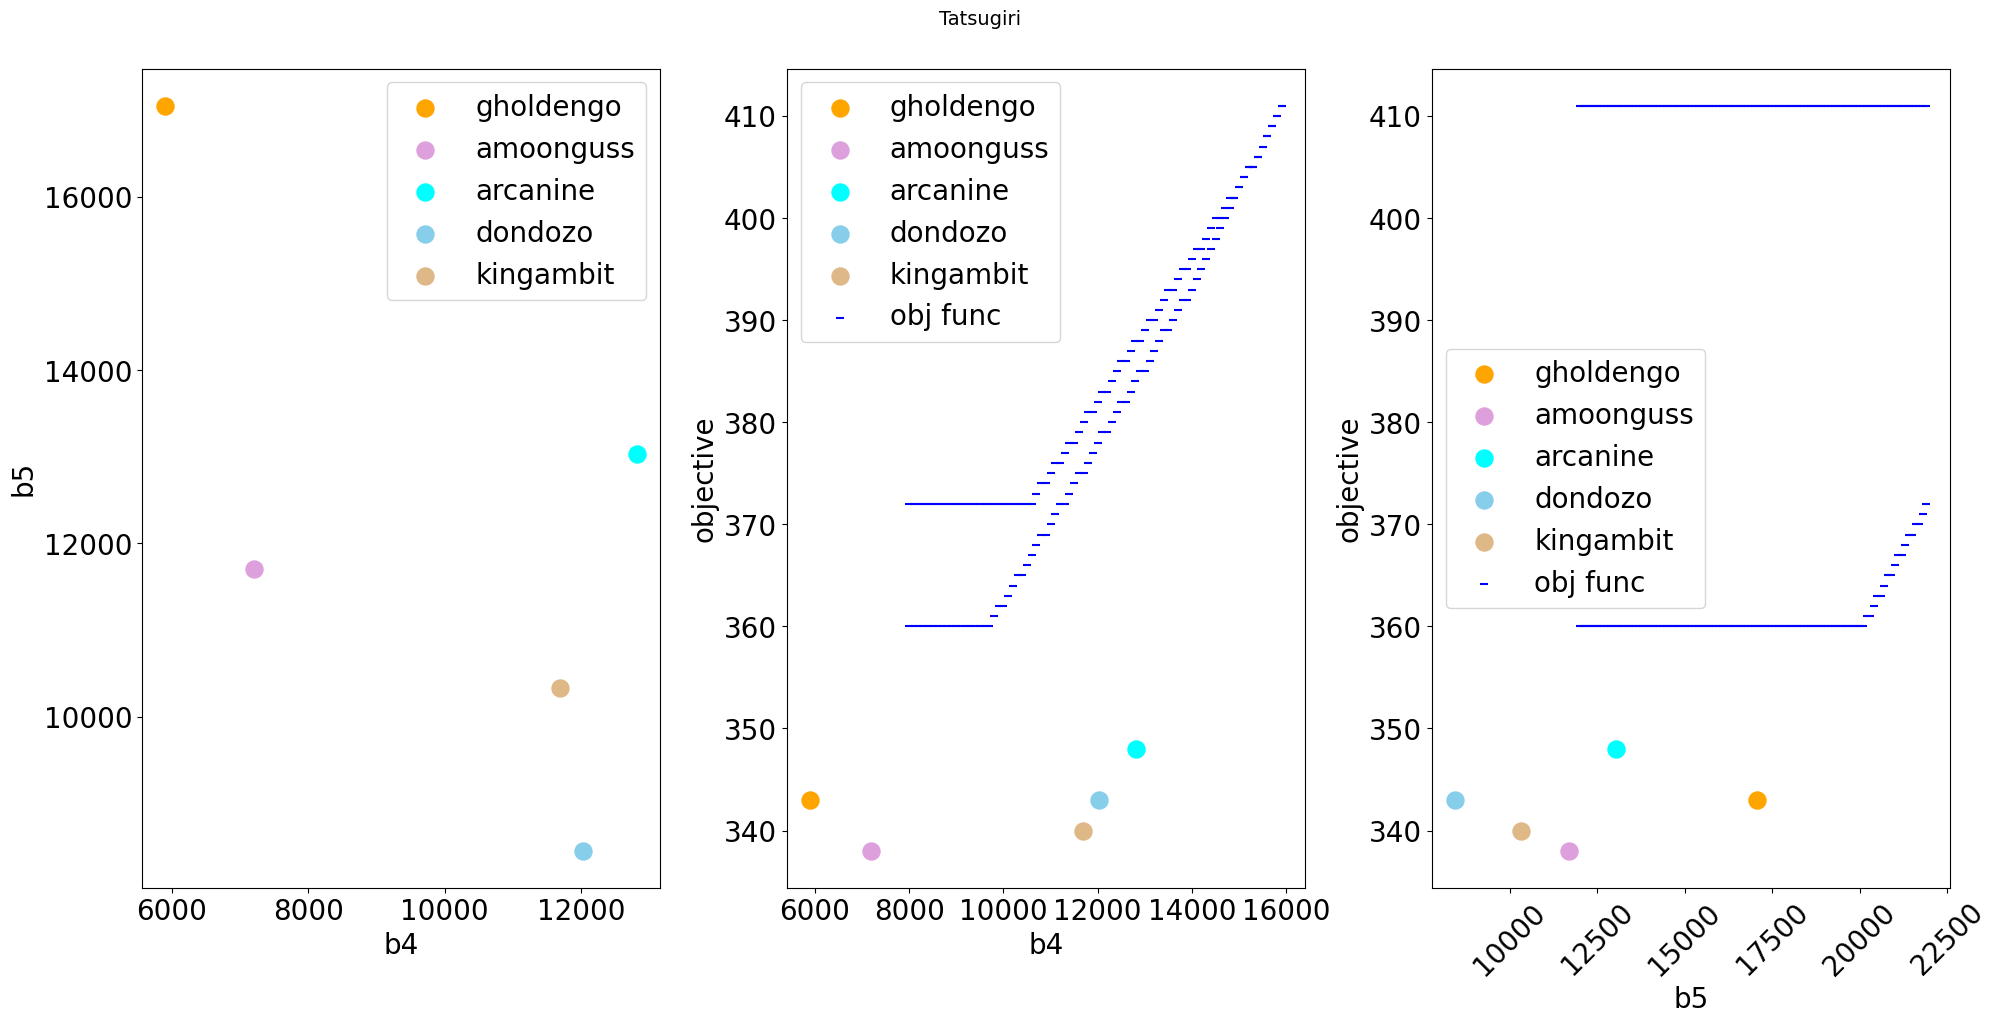

In [116]:
tatsugiri_df = get_scatter_df('tatsugiri')
create_scatter(tatsugiri_df,  generated_scatter_df, "Tatsugiri")

In [96]:
great_tusk_df = get_scatter_df('great-tusk')
create_scatter(great_tusk_df, "Great Tusk")

TypeError: create_scatter() missing 1 required positional argument: 'title'

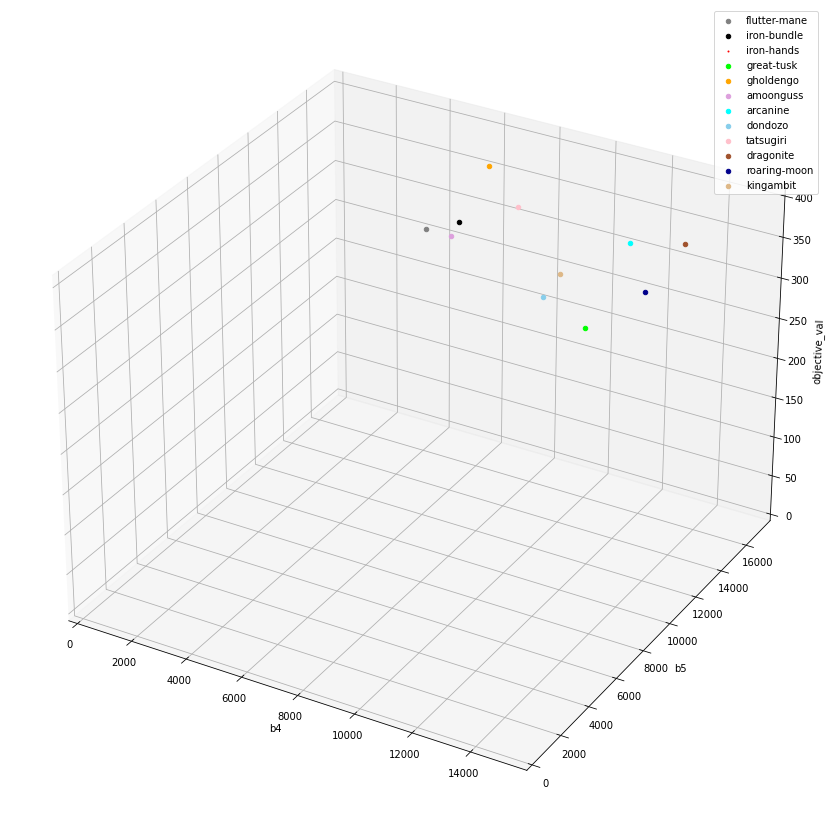

In [ ]:
fig = plt.figure(figsize=(15, 15))
ax = fig.add_subplot(projection='3d')

attacker_colors = list(map(lambda attacker: color_dict[attacker], flutter_mane_df['attacker'].tolist()))
# attacker_labels = 
# label=color,
for b4, b5, objective_val, attacker in zip(flutter_mane_df['b4'].tolist(), flutter_mane_df['b5'].tolist(), flutter_mane_df["objective_val"].tolist(),flutter_mane_df['attacker'].tolist()):
  ax.scatter([b4], [b5], [objective_val], marker='o', c=color_dict[attacker], label=attacker)
# ax.scatter(flutter_mane_df['b4'].tolist(), flutter_mane_df['b5'].tolist(), flutter_mane_df["objective_val"], marker='o', c=attacker_colors, label=flutter_mane_df['attacker'].tolist())

ax.set_xlabel('b4')
ax.set_ylabel('b5')
ax.set_zlabel('objective_val')
ax.set_xlim(xmin=0)
ax.set_ylim(ymin=0)
ax.set_zlim(zmin=0)
ax.legend()

# plt.plot(dates, values, '-o')

plt.show()
# flutter_mane_df

In [ ]:
print("proportion of problems that are infeasible: " + str(df['is_infeasible'].mean()))

proportion of problems that are infeasible: 0.006944444444444444
